# 🎯 Objetivo do MVP

## 🧩 Problema a ser resolvido

No contexto do varejo físico, espaços publicitários dentro das lojas representam uma importante fonte de receita e relacionamento com marcas parceiras. No entanto, a gestão dessas locações costuma ser feita de forma descentralizada, dificultando a análise de desempenho, ocupação e retorno sobre investimento.

A ausência de uma estrutura analítica padronizada torna desafiador responder perguntas como:
- Quais fornecedores mais investem em espaços nas lojas?
- Quais espaços têm maior demanda?
- Onde estão ocorrendo falhas operacionais (ex: comprovações pendentes)?
- Existem lojas com baixa taxa de ocupação de espaços?

---

## 🎯 Objetivo do trabalho

O objetivo deste MVP é construir um pipeline de dados analítico que permita acompanhar e entender o uso dos espaços publicitários locados em lojas, viabilizando análises por fornecedor, loja, espaço e período.

---

## ❓ Perguntas que serão respondidas com o MVP

1. Quais fornecedores mais investiram em espaços nos últimos meses?
2. Quais lojas concentram mais locações ao longo do tempo?
3. Quais espaços estão sendo mais locados e quais estão ociosos?
4. Qual a taxa de ocupação dos espaços por loja?
5. Qual o valor total locado por loja e por fornecedor mês a mês?
6. Como está a distribuição dos status de comprovação?

---

## 🛠️ Como o problema será resolvido?

- Construção de um pipeline em camadas: Bronze (raw), Silver (limpeza e modelagem) e Gold (análises).
- Estruturação em modelo estrela com tabela fato (`fato_locacao`) e dimensão (`dim_espaco`).
- Transformações usando PySpark no Databricks com Delta Lake.
- Visualizações e tabelas agregadas que possibilitam análises estratégicas para a área de trade marketing.


### **CARGA DE DADOS PARA A CAMADA BRONZE**

Carga da base de espaços publicitários

In [0]:
# Apagar a tabela Bronze se já existir
spark.sql("DROP TABLE IF EXISTS bronze_espacos")

# Leitura do CSV com delimitador e encoding apropriado
df_espacos = (
    spark.read
    .option("header", True)
    .option("inferSchema", True)
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .csv("dbfs:/FileStore/tables/espacos.csv")
)

# Gravação na camada Bronze como tabela Delta
df_espacos.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("bronze_espacos")


In [0]:
display(spark.table("bronze_espacos").limit(10))


Segmento,IdLocacao,Tipo,Espaco,Setor,Descricao,Loja,Visibilidade,Preco,Potencial
Varejo,BOA-6-1,COMUNICAÇÃO,ADESIVO DE PAREDE,SALÃO,Testeira de Parede da Escada,TudoLar Pátio Roraima Shopping,REGULAR,1900,SIM
Varejo,GRA-6-1,COMUNICAÇÃO,ADESIVO DE PAREDE,-,Acima da sanca de Informatica e Fogões,TudoLar Grande Circular,ÓTIMA,5600,SIM
Varejo,MAN-14-8,EXPOSIÇÃO,EXPOSITOR,SAMSUNG HA,"Linha branca, lateral, direita, próximo aos splits",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,ARI-15-18,EXPOSIÇÃO,FRONTAL,G,Entrada loja,TudoLar Ariquemes,EXCELENTE,1650,SIM
Varejo,JAT-15-4,EXPOSIÇÃO,FRONTAL,M,Acesso pela rua Jatuarana,TudoLar Jatuarana,EXCELENTE,2050,SIM
Varejo,AMA-17-3,EXPOSIÇÃO,HOME TV,LG,"Rack de TV LG, eletrônicos, lado esquerdo",TudoLar Amazonas Shopping,ÓTIMA,7350,SIM
Varejo,MAN-17-11,EXPOSIÇÃO,HOME TV,LG,"Eletrônicos, lateral, direita, frontal",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,MAN-17-12,EXPOSIÇÃO,HOME TV,LG,"Eletrônicos, lateral, esquerda, frontal, próximo a Farma",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,SHO-17-2,EXPOSIÇÃO,HOME TV,VÍDEO,"Eletrônicos, a direita",TudoLar Ponta Negra Shopping,ÓTIMA,2300,SIM
Varejo,MAN-17-9,EXPOSIÇÃO,HOME TV,SAMSUNG CE,"Eletrônicos, lateral, direita, frontal",TudoLar Manauara Shopping,ÓTIMA,6550,SIM


Carga da base de Locacações dos espaços

In [0]:
# Apagar a tabela Bronze se já existir
spark.sql("DROP TABLE IF EXISTS bronze_locacoes")

# Leitura do CSV com delimitador e encoding apropriado
df_locacoes = (
    spark.read
    .option("header", True)
    .option("inferSchema", True)
    .option("delimiter", ";")
    .option("encoding", "UTF-8")
    .csv("dbfs:/FileStore/tables/locacoes.csv")
)

# Gravação na camada Bronze como tabela Delta
df_locacoes.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("bronze_locacoes")

In [0]:
# Visualização organizada dos 10 primeiros registros
display(spark.table("bronze_locacoes").limit(10))

TipoComprovacao,Segmento,IdLocacao,Espaco,Loja,Setor,Descricao,Fornecedor,Marca,PeriodoInicio,PeriodoFim,ValorLocacao,Bonificação,Observacoes,StatusComprovacao
Locação,Varejo,AMA-21-6,MESA DE VALORIZAÇÃO,TudoLar Amazonas Shopping,AUTOSSERVIÇO,Estante em frente a gôndola de ventiladores,BRITÂNIA,null,45597,45626,2250,null,null,Comprovado
Locação,Varejo,BOA-27-14,PLAQUETA DE MONITOR,TudoLar Pátio Roraima Shopping,-,"333 unidades - Frente: 0,8cm (A) x 0,38 (L) cm",null,null,null,null,null,null,null,null
"Verso: 0,7cm (A) x 0,38 (L) cm """,CLARO,null,45627,45656,"142,8571429",null,null,Pendente,null,null,null,null,null,null
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45748,45777,7350,null,null,Comprovado
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45809,45838,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45839,45869,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45870,45900,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45901,45930,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45962,45991,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,45931,45961,7350,null,null,Pendente


### TRANFORMAÇÃO PARA A CAMADA SILVER

Transformação da tabela de espaços

In [0]:
from pyspark.sql.functions import col, trim

# Carregar a tabela Bronze
df_bronze = spark.table("bronze_espacos")

# Filtrar: eliminar registros com qualquer um dos três campos nulo ou vazio
df_silver = df_bronze.filter(
    (col("IdLocacao").isNotNull()) & (trim(col("IdLocacao")) != "") &
    (col("Loja").isNotNull()) & (trim(col("Loja")) != "") &
    (col("Espaco").isNotNull()) & (trim(col("Espaco")) != "")
)

# Salvar na camada Silver
df_silver.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("silver_espacos")

# Visualizar os primeiros registros
display(spark.table("silver_espacos").limit(10))


Segmento,IdLocacao,Tipo,Espaco,Setor,Descricao,Loja,Visibilidade,Preco,Potencial
Varejo,BOA-6-1,COMUNICAÇÃO,ADESIVO DE PAREDE,SALÃO,Testeira de Parede da Escada,TudoLar Pátio Roraima Shopping,REGULAR,1900,SIM
Varejo,GRA-6-1,COMUNICAÇÃO,ADESIVO DE PAREDE,-,Acima da sanca de Informatica e Fogões,TudoLar Grande Circular,ÓTIMA,5600,SIM
Varejo,MAN-14-8,EXPOSIÇÃO,EXPOSITOR,SAMSUNG HA,"Linha branca, lateral, direita, próximo aos splits",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,ARI-15-18,EXPOSIÇÃO,FRONTAL,G,Entrada loja,TudoLar Ariquemes,EXCELENTE,1650,SIM
Varejo,JAT-15-4,EXPOSIÇÃO,FRONTAL,M,Acesso pela rua Jatuarana,TudoLar Jatuarana,EXCELENTE,2050,SIM
Varejo,AMA-17-3,EXPOSIÇÃO,HOME TV,LG,"Rack de TV LG, eletrônicos, lado esquerdo",TudoLar Amazonas Shopping,ÓTIMA,7350,SIM
Varejo,MAN-17-11,EXPOSIÇÃO,HOME TV,LG,"Eletrônicos, lateral, direita, frontal",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,MAN-17-12,EXPOSIÇÃO,HOME TV,LG,"Eletrônicos, lateral, esquerda, frontal, próximo a Farma",TudoLar Manauara Shopping,ÓTIMA,6550,SIM
Varejo,SHO-17-2,EXPOSIÇÃO,HOME TV,VÍDEO,"Eletrônicos, a direita",TudoLar Ponta Negra Shopping,ÓTIMA,2300,SIM
Varejo,MAN-17-9,EXPOSIÇÃO,HOME TV,SAMSUNG CE,"Eletrônicos, lateral, direita, frontal",TudoLar Manauara Shopping,ÓTIMA,6550,SIM


Transformação das tabelas de locacoes

In [0]:
from pyspark.sql.functions import col, trim, expr, to_date

# Carregar a tabela Bronze
df_bronze = spark.table("bronze_locacoes")

# Filtrar registros com campos obrigatórios preenchidos
df_filtrado = df_bronze.filter(
    (col("IdLocacao").isNotNull()) & (trim(col("IdLocacao")) != "") &
    (col("Fornecedor").isNotNull()) & (trim(col("Fornecedor")) != "") &
    (col("PeriodoInicio").isNotNull()) &
    (col("PeriodoFim").isNotNull())
)

# Converter datas (número Excel para data)
df_silver = df_filtrado.withColumn(
    "PeriodoInicio", expr("date_add(to_date('1899-12-30'), cast(PeriodoInicio as int))")
).withColumn(
    "PeriodoFim", expr("date_add(to_date('1899-12-30'), cast(PeriodoFim as int))")
)

# Salvar como Silver
df_silver.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("silver_locacoes")

# Visualizar para conferir
display(spark.table("silver_locacoes").limit(10))


TipoComprovacao,Segmento,IdLocacao,Espaco,Loja,Setor,Descricao,Fornecedor,Marca,PeriodoInicio,PeriodoFim,ValorLocacao,Bonificação,Observacoes,StatusComprovacao
Locação,Varejo,AMA-21-6,MESA DE VALORIZAÇÃO,TudoLar Amazonas Shopping,AUTOSSERVIÇO,Estante em frente a gôndola de ventiladores,BRITÂNIA,null,2024-11-01,2024-11-30,2250,null,null,Comprovado
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-04-01,2025-04-30,7350,null,null,Comprovado
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-06-01,2025-06-30,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-07-01,2025-07-31,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-08-01,2025-08-31,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-09-01,2025-09-30,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-11-01,2025-11-30,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-10-01,2025-10-31,7350,null,null,Pendente
Locação,Varejo,AMA-17-3,HOME TV,TudoLar Amazonas Shopping,LG,"Rack de TV LG, eletrônicos, lado esquerdo",LG,LG,2025-12-01,2025-12-31,7350,null,null,Pendente
Locação,Varejo,MAN-17-11,HOME TV,TudoLar Manauara Shopping,LG,"Eletrônicos, lateral, direita, frontal",LG,LG,2025-01-01,2025-01-31,6550,null,null,Comprovado


Modelagem dos dados para o o modelo Estrela, trabalhando normalização das tabelas, separando entre fato_locacao e dim_espacos

# 📚 Catálogo de Dados

## 🧩 Tabela: `silver_dim_espaco`

| Coluna       | Tipo     | Descrição                                      | Domínio esperado                    |
|--------------|----------|------------------------------------------------|-------------------------------------|
| `id_locacao` | string   | Identificador único do espaço                  | Código alfanumérico (ex: LOC001)    |
| `espaco`     | string   | Código ou nome do espaço                       | Ex: Gôndola 1, Ponta de gôndola     |
| `loja`       | string   | Nome ou código da loja onde o espaço está      | Texto livre                         |
| `tipo`       | string   | Tipo físico do espaço                          | Gôndola, Ponta, Expositor, etc.     |
| `setor`      | string   | Setor da loja onde o espaço está               | Eletro, Móveis, Bazar, etc.         |
| `descricao`  | string   | Descrição textual do espaço                    | Texto livre                         |
| `visibilidade` | string | Classificação visual do espaço                 | Alta, Média, Baixa                  |
| `preco`      | double   | Preço base da locação                          | ≥ 0                                 |
| `potencial`  | string   | Potencial de impacto do espaço                 | Alto, Médio, Baixo                  |

---

## 📦 Tabela: `silver_fato_locacao`

| Coluna             | Tipo   | Descrição                                     | Domínio esperado              |
|--------------------|--------|-----------------------------------------------|-------------------------------|
| `id_locacao`       | string | Identificador do espaço locado                | Deve existir na `dim_espaco` |
| `fornecedor`       | string | Nome do fornecedor que fez a locação          | Texto                         |
| `marca`            | string | Marca exibida na locação                      | Texto                         |
| `data_inicio`      | date   | Data de início da locação                     | yyyy-MM-dd                    |
| `data_fim`         | date   | Data de término da locação                    | yyyy-MM-dd                    |
| `valor_locacao`    | double | Valor investido na locação                    | ≥ 0                           |
| `bonificacao`      | double | Valor de bonificação aplicado                 | ≥ 0                           |
| `status_comprovacao` | string | Status da comprovação da entrega da ativação | Aprovado, Pendente, Reprovado |



In [0]:
# Criar a dimensão de espaços a partir da silver_espacos
df_dim_espaco = (
    spark.table("silver_espacos")
    .select(
        col("IdLocacao").alias("id_locacao"),
        col("Espaco").alias("espaco"),
        col("Loja").alias("loja"),
        col("Tipo").alias("tipo"),
        col("Setor").alias("setor"),
        col("Descricao").alias("descricao"),
        col("Visibilidade").alias("visibilidade"),
        col("Preco").alias("preco"),
        col("Potencial").alias("potencial")
    )
    .dropDuplicates(["id_locacao"])  # garante chave única
)

df_dim_espaco.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("silver_dim_espaco")


In [0]:
# Criar a fato de locações a partir da silver_locacoes
# Carregar Silver
df_locacoes = spark.table("silver_locacoes")
df_espacos = spark.table("silver_espacos")

# Filtrar apenas locações com IdLocacao existente na dimensão
df_locacoes_validas = df_locacoes.join(
    df_espacos.select("IdLocacao").dropDuplicates(),
    on="IdLocacao",
    how="inner"
)

# Construir a fato limpa
df_fato_locacao = (
    df_locacoes_validas.select(
        col("IdLocacao").alias("id_locacao"),
        col("Fornecedor").alias("fornecedor"),
        col("Marca").alias("marca"),
        col("PeriodoInicio").alias("data_inicio"),
        col("PeriodoFim").alias("data_fim"),
        col("ValorLocacao").alias("valor_locacao"),
        col("Bonificação").alias("bonificacao"),
        col("StatusComprovacao").alias("status_comprovacao")
    )
)

# Salvar com overwrite
df_fato_locacao.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("silver_fato_locacao")

# Visualizar para conferir
display(spark.table("silver_fato_locacao").limit(10))



id_locacao,fornecedor,marca,data_inicio,data_fim,valor_locacao,bonificacao,status_comprovacao
608-36-1,Hypera CH/PP,Hypera CH/PP,null,null,300,null,Pendente
SHO-17-1,SAMSUNG DA AMAZ,null,2024-12-01,2024-12-30,5000,null,Comprovado
SHO-17-1,SAMSUNG DA AMAZ,null,2024-11-01,2024-11-30,5000,null,Comprovado
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-12-01,2025-12-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-11-01,2025-11-30,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-10-01,2025-10-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-09-01,2025-09-30,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-08-01,2025-08-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-07-01,2025-07-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-06-01,2025-06-30,1610,null,Pendente


In [0]:
display(spark.table("silver_dim_espaco").limit(10))
display(spark.table("silver_fato_locacao").limit(10))


id_locacao,espaco,loja,tipo,setor,descricao,visibilidade,preco,potencial
101-3719-17,MESA DE VALORIZAÇÃO,TudoLar Matriz,EXPOSIÇÃO,AUTOSSERVIÇO,null,REGULAR,1900,SIM
101-605-13,QUADRO PROMOCIONAL,TudoLar Matriz,COMUNICAÇÃO,SALÃO,null,ÓTIMA,1700,SIM
101-628-14,PONTA DE GÔNDOLA,TudoLar Matriz,EXPOSIÇÃO,AUTOSSERVIÇO,Frontal entrada autosserviço,REGULAR,3650,SIM
101-638-15,ILHA DE PRODUTOS,TudoLar Matriz,EXPOSIÇÃO,SALÃO,"Na frente da ilha de produtos, na parede direita de quem entra na loja",ÓTIMA,3450,SIM
101-654-16,ADESIVO DE PRÉ-VENDA,TudoLar Matriz,COMUNICAÇÃO,SALÃO,Adesivo embaixo da estação de pré-venda,REGULAR,"1710,34",SIM
103-619-35,QUADRO PROMOCIONAL,TudoLar Avenida,COMUNICAÇÃO,SALÃO,null,ÓTIMA,2550,SIM
103-620-36,PONTA DE GÔNDOLA,TudoLar Avenida,EXPOSIÇÃO,AUTOSSERVIÇO,"Entrada do Autosserviço, esquerda, 3",REGULAR,2850,SIM
103-627-37,MESA DE VALORIZAÇÃO,TudoLar Avenida,EXPOSIÇÃO,AUTOSSERVIÇO,"Entrada Autosserviço, frontal",REGULAR,3650,SIM
103-640-38,ADESIVO DE PRÉ-VENDA,TudoLar Avenida,COMUNICAÇÃO,SALÃO,Adesivo embaixo da estação de pré-venda,REGULAR,"2565,68",SIM
105-613-14,QUADRO PROMOCIONAL,TudoLar Educandos,COMUNICAÇÃO,SALÃO,null,ÓTIMA,1700,SIM


id_locacao,fornecedor,marca,data_inicio,data_fim,valor_locacao,bonificacao,status_comprovacao
608-36-1,Hypera CH/PP,Hypera CH/PP,null,null,300,null,Pendente
SHO-17-1,SAMSUNG DA AMAZ,null,2024-12-01,2024-12-30,5000,null,Comprovado
SHO-17-1,SAMSUNG DA AMAZ,null,2024-11-01,2024-11-30,5000,null,Comprovado
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-12-01,2025-12-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-11-01,2025-11-30,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-10-01,2025-10-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-09-01,2025-09-30,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-08-01,2025-08-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-07-01,2025-07-31,1610,null,Pendente
SHO-17-1,SAMSUNG CE TV,Samsung TV,2025-06-01,2025-06-30,1610,null,Pendente


### TRANFORMAÇÃO PARA A CAMADA GOLD

Criação da tabela com a visão de valor e quantidade de locação por mes e  fornecedor

In [0]:
from pyspark.sql.functions import date_format, sum as _sum, count

# Carregar a fato
df_fato = spark.table("silver_fato_locacao")

# Criar a agregação por fornecedor e mês
df_gold = (
    df_fato
    .withColumn("mes_ano", date_format("data_inicio", "yyyy-MM"))
    .groupBy("fornecedor", "mes_ano")
    .agg(
        count("*").alias("qtd_locacoes"),
        _sum("valor_locacao").alias("valor_total_locado")
    )
    .orderBy("fornecedor", "mes_ano")
)

# Salvar como tabela Gold
df_gold.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("gold_locacoes_por_fornecedor_mes")

# Visualizar
display(spark.table("gold_locacoes_por_fornecedor_mes").limit(20))


fornecedor,mes_ano,qtd_locacoes,valor_total_locado
B&D,2024-11,4,21000.0
B&D,2024-12,4,21000.0
B&D,2025-01,5,21200.0
B&D,2025-02,4,17600.0
B&D,2025-03,4,17600.0
B&D,2025-04,4,17600.0
B&D,2025-05,4,17600.0
B&D,2025-06,4,17600.0
B&D,2025-07,4,17600.0
B&D,2025-08,4,17600.0


Criação da tabela com a visão de valor e quantidade de locação por mes e loja

In [0]:
from pyspark.sql.functions import date_format, sum as _sum, count

# Carregar fato e dimensão (ambas já consistentes)
df_fato = spark.table("silver_fato_locacao")
df_dim = spark.table("silver_dim_espaco")

# Enriquecer a fato com a loja (join pela id_locacao)
df_join = df_fato.join(df_dim, on="id_locacao", how="left")

# Agregação por loja e mês
df_gold = (
    df_join
    .withColumn("mes_ano", date_format("data_inicio", "yyyy-MM"))
    .groupBy("loja", "mes_ano")
    .agg(
        count("*").alias("qtd_locacoes"),
        _sum("valor_locacao").alias("valor_total_locado")
    )
    .orderBy("loja", "mes_ano")
)

# Sobrescrever a tabela Gold
df_gold.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("gold_locacoes_por_loja_mes")

# Visualização
display(spark.table("gold_locacoes_por_loja_mes").limit(20))


loja,mes_ano,qtd_locacoes,valor_total_locado
BV Getulio Vargas,2024-11,2,null
BV Getulio Vargas,2024-12,2,null
BV Getulio Vargas,2025-01,3,550.0
BV Getulio Vargas,2025-02,2,550.0
BV Getulio Vargas,2025-03,2,550.0
BV Getulio Vargas,2025-04,3,550.0
BV Getulio Vargas,2025-05,3,550.0
BV Getulio Vargas,2025-06,3,550.0
BV Getulio Vargas,2025-07,1,550.0
BV Getulio Vargas,2025-08,1,550.0


Criação da tabela com a visão de valor e quantidade de locação por mes e espaço

In [0]:
from pyspark.sql.functions import current_date, date_sub, col, sum as _sum, count

# Tabelas
df_fato = spark.table("silver_fato_locacao")
df_dim = spark.table("silver_dim_espaco")

# Calcular 3 meses atrás (aproximadamente 90 dias)
data_limite = date_sub(current_date(), 90)

# Filtrar locações recentes
df_filtrado = df_fato.filter(col("data_inicio") >= data_limite)

# Agregar por espaço
df_agg = (
    df_filtrado.groupBy("id_locacao")
    .agg(
        count("*").alias("qtd_locacoes_3m"),
        _sum("valor_locacao").alias("valor_total_3m")
    )
)

# Enriquecer com dados da dimensão
df_gold = df_agg.join(df_dim, on="id_locacao", how="left") \
    .select(
        "id_locacao",
        "espaco",
        "loja",
        "descricao",
        "qtd_locacoes_3m",
        "valor_total_3m"
    ).orderBy(col("qtd_locacoes_3m").desc())

# Salvar como tabela Gold
df_gold.write \
    .format("delta") \
    .mode("overwrite") \
    .saveAsTable("gold_espacos_destaque_3_meses")

# Visualizar
display(spark.table("gold_espacos_destaque_3_meses").limit(20))


id_locacao,espaco,loja,descricao,qtd_locacoes_3m,valor_total_3m
AMA-18-10,ILHA DE PRODUTOS,TudoLar Amazonas Shopping,"Entrada externa, esquerda, em frente a Farma, 1",14,102900.0
MAT-21-2,MESA DE VALORIZAÇÃO,TudoLar Matriz,"Salão, parecede central em frente aos caixas",13,19000.0
IRA-6-3,ADESIVO DE PAREDE,TudoLar Iranduba,"Parede 06, escada de acesso ao setor de Móveis",11,7150.0
106-592-28,MESA DE CELULAR,TudoLar Amazonas Shopping,"Eletrônicos, frontal, esquerda",11,72765.0
PAR-6-7,ADESIVO DE PAREDE,TudoLar Parintins,Parede da escada para móveis,11,null
GRA-21-6,MESA DE VALORIZAÇÃO,TudoLar Grande Circular,"Salão de vendas, ao lado da escada rolante",11,40920.0
MAN-6-17,ADESIVO DE PAREDE,TudoLar Manacapuru,"Adesivo de parede, escada de acesso autosserviço para móveis.",11,null
MAN-24-19,PAINEL DE COLUNA,TudoLar Manauara Shopping,"Linha branca, lateral, esquerda",11,64845.0
GRA-3-14,ADESIVO DE ESCADA,TudoLar Grande Circular,"2,68 m (A) x 1,92 m (L)",11,46200.0
SHO-20-7,MESA DE CELULAR,TudoLar Ponta Negra Shopping,"Frontal, Próximo a ilha de celulares 2",11,11385.0


Calculo da taxa de ocupação por loja nos ultimos 3 meses

In [0]:
from pyspark.sql.functions import current_date, date_sub, col, countDistinct, round

# Tabelas
df_fato = spark.table("silver_fato_locacao")
df_dim = spark.table("silver_dim_espaco")

# Data de corte
data_limite = date_sub(current_date(), 90)

# Espaços locados nos últimos 3 meses
df_locados = df_fato.filter(col("data_inicio") >= data_limite)

# Join com dimensão para identificar loja dos espaços locados
df_locados_loja = df_locados.join(df_dim, on="id_locacao", how="inner")

# Agregado: locados por loja
df_locados_por_loja = (
    df_locados_loja
    .groupBy("loja")
    .agg(countDistinct("id_locacao").alias("espacos_locados"))
)

# Total de espaços por loja
df_total_por_loja = (
    df_dim
    .groupBy("loja")
    .agg(countDistinct("id_locacao").alias("espacos_totais"))
)

# Join e cálculo da taxa de ocupação
df_taxa = (
    df_total_por_loja.join(df_locados_por_loja, on="loja", how="left")
    .fillna(0, subset=["espacos_locados"])
    .withColumn("taxa_ocupacao", round(col("espacos_locados") / col("espacos_totais") * 100, 1))
)

# Salvar
df_taxa.write.mode("overwrite").format("delta").saveAsTable("gold_taxa_ocupacao_por_loja")

# Visualizar
display(spark.table("gold_taxa_ocupacao_por_loja"))


loja,espacos_totais,espacos_locados,taxa_ocupacao
TudoLar Boa Vista Major Williams,9,5,55.6
TudoLar Avenida,38,15,39.5
TudoLar Farma Codajas,36,0,0.0
TudoLar Farma Torquato,69,0,0.0
TudoLar Farma Amazonas Shopping,68,0,0.0
TudoLar Farma Rio Branco,59,0,0.0
TudoLar Farma Presidente Figueiredo,55,0,0.0
TudoLar Farma Cruzeiro Do Sul,52,0,0.0
TudoLar Cidade Nova,55,20,36.4
TudoLar Farma Db Ponta Negra,76,0,0.0


Espaços sem locação nos últimos 3 meses

In [0]:
# Espaços locados nos últimos 3 meses
df_locados_3m = df_fato.filter(col("data_inicio") >= data_limite) \
    .select("id_locacao").distinct()

# Espaços que não aparecem nessa lista
df_ociosos = df_dim.join(
    df_locados_3m,
    on="id_locacao",
    how="left_anti"  # mantém apenas os que não têm locações
)

# Salvar
df_ociosos.write.mode("overwrite").format("delta").saveAsTable("gold_espacos_ociosos")

# Visualizar
display(spark.table("gold_espacos_ociosos"))


id_locacao,espaco,loja,tipo,setor,descricao,visibilidade,preco,potencial
101-638-15,ILHA DE PRODUTOS,TudoLar Matriz,EXPOSIÇÃO,SALÃO,"Na frente da ilha de produtos, na parede direita de quem entra na loja",ÓTIMA,3450,SIM
106-3714-34,ILHA DE PRODUTOS,TudoLar Amazonas Shopping,EXPOSIÇÃO,LINHA BRANCA,null,ÓTIMA,5000,SIM
114-594-32,MESA DE CELULAR,TudoLar Ponta Negra,EXPOSIÇÃO,TELEFONIA,"Eletrônicos, frontal, atrás da ilha de celulares 2",ÓTIMA,7250,SIM
115-3714-53,ILHA DE PRODUTOS,TudoLar Cidade Nova,EXPOSIÇÃO,LINHA BRANCA,Próximo a Farma,EXCELENTE,5000,SIM
115-3725-56,GÔNDOLA DE PRODUTOS,TudoLar Cidade Nova,EXPOSIÇÃO,AUTOSSERVIÇO,"Entrada do autosserviço, ao lado da mesa da gerência",BAIXA,"4675,23",SIM
118-3714-56,ILHA DE PRODUTOS,TudoLar Camapuã,EXPOSIÇÃO,LINHA BRANCA,Próximo da Escada,ÓTIMA,5000,SIM
120-631-36,MESA DE CELULAR,TudoLar Ponta Negra Shopping,EXPOSIÇÃO,TELEFONIA,Mesa de celular,ÓTIMA,null,SIM
201-3703-10,EXPOSITOR,TudoLar Porto Velho Centro,EXPOSIÇÃO,VÍDEO,[NOVO ESPAÇO] GERÊNCIA AVALIAR UM ESPAÇO PARA BASE DA TV SAMSUNG,ÓTIMA,"4183,56",SIM
201-622-4,ILHA DE PRODUTOS,TudoLar Porto Velho Centro,EXPOSIÇÃO,AUTOSSERVIÇO,null,BAIXA,2050,SIM
201-624-5,ILHA DE PRODUTOS,TudoLar Porto Velho Centro,EXPOSIÇÃO,AUTOSSERVIÇO,null,BAIXA,2700,SIM


### ANALISE DOS **DADOS**

# 🔍 Análise de Qualidade dos Dados

Foi realizada uma verificação sistemática da qualidade dos dados nas camadas Bronze e Silver, com foco nos seguintes pontos:

### ✅ Validações aplicadas:

- **Valores obrigatórios:** Foram excluídos registros com valores nulos ou em branco nas colunas essenciais (`IdLocacao`, `Fornecedor`, `PeriodoInicio`, `PeriodoFim`).
- **Consistência entre tabelas:** Na tabela `silver_fato_locacao`, os dados foram filtrados para garantir que somente `id_locacao` existentes na `silver_dim_espaco` fossem considerados. Isso evita registros órfãos.
- **Conversão de datas:** Campos `PeriodoInicio` e `PeriodoFim` estavam em formato numérico (estilo Excel) e foram convertidos corretamente para o formato de data (`yyyy-MM-dd`).
- **Tratamento de encoding:** Foi aplicado `UTF-8` na leitura dos CSVs e uso de `trim()` para evitar espaços ocultos.
- **Eliminação de duplicatas:** A dimensão `silver_dim_espaco` foi deduplicada por `id_locacao`, garantindo chave única.
- **Verificação de tipos:** Tipos como `double`, `string` e `date` foram revisados nas colunas apropriadas.

### 📌 Conclusão:

Após as transformações na camada Silver, os dados apresentaram boa qualidade, permitindo gerar análises confiáveis na camada Gold. Os problemas encontrados foram tratados e documentados, e os datasets estão aptos para uso analítico e visualizações de negócio.


## ❓ Pergunta 1: Quais fornecedores mais investem em espaços nas lojas?

Esta análise busca identificar os fornecedores que mais investiram em locações de espaços publicitários nos últimos 3 meses. A visualização considera o valor total locado por cada fornecedor nesse período, ajudando a entender quem são os parceiros mais estratégicos e ativos.

### 📊 Gráfico: Valor total investido por fornecedor (últimos 3 meses)


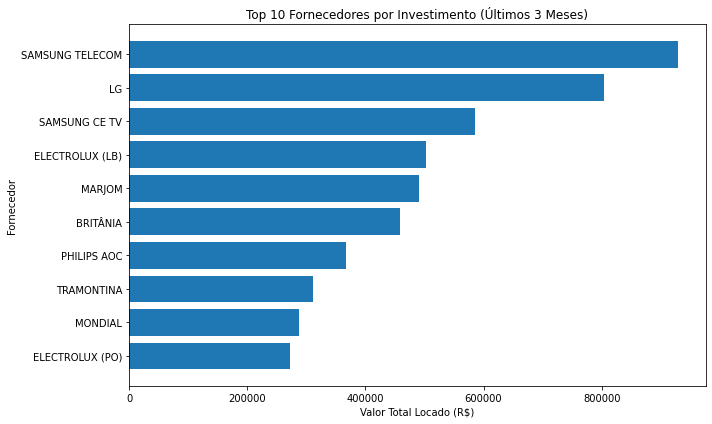

In [0]:
import matplotlib.pyplot as plt

# Coleta dos dados
df_fato = spark.table("silver_fato_locacao")
data_limite = date_sub(current_date(), 90)
df_filtrado = df_fato.filter(col("data_inicio") >= data_limite)

# Agregação por fornecedor
df_fornecedor = (
    df_filtrado.groupBy("fornecedor")
    .agg(_sum("valor_locacao").alias("valor_total"))
    .orderBy(col("valor_total").desc())
    .limit(10)
)

# Converter para Pandas
pdf = df_fornecedor.toPandas()

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(pdf["fornecedor"], pdf["valor_total"])
plt.xlabel("Valor Total Locado (R$)")
plt.ylabel("Fornecedor")
plt.title("Top 10 Fornecedores por Investimento (Últimos 3 Meses)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## ❓ Pergunta 2: Quais lojas concentram mais locações ao longo do tempo?

Esta análise busca identificar as lojas que receberam o maior número de locações ao longo do período analisado. Isso ajuda a compreender quais unidades têm maior atratividade para os fornecedores e podem estar gerando mais retorno para o varejo.

### 📊 Gráfico: Total de locações por loja (acumulado)


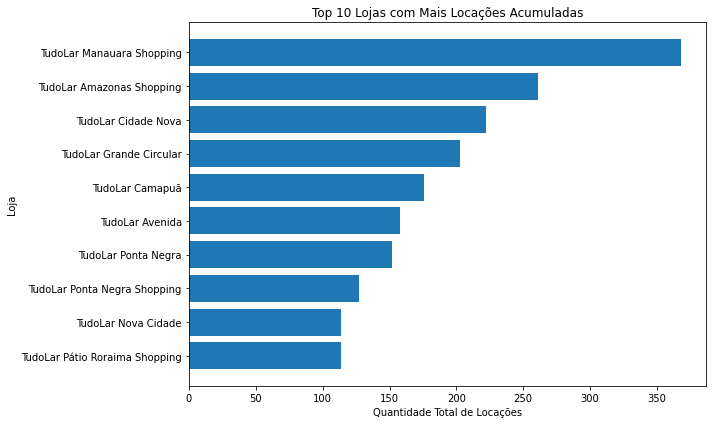

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, sum as _sum

# Carrega a Gold com locações por loja/mês
df = spark.table("gold_locacoes_por_loja_mes")

# Agrega total acumulado de locações por loja
df_lojas = (
    df.groupBy("loja")
    .agg(_sum("qtd_locacoes").alias("total_locacoes"))
    .orderBy(col("total_locacoes").desc())
    .limit(10)
)

# Converte para Pandas
pdf = df_lojas.toPandas()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.barh(pdf["loja"], pdf["total_locacoes"])
plt.xlabel("Quantidade Total de Locações")
plt.ylabel("Loja")
plt.title("Top 10 Lojas com Mais Locações Acumuladas")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## ❓ Pergunta 3: Quais espaços estão sendo mais locados nos últimos 3 meses?

Esta análise identifica os espaços com maior volume de locações no período recente, permitindo compreender quais ativos estão com maior demanda por parte dos fornecedores. Espaços com alta frequência de uso podem indicar boa localização, visibilidade ou valor estratégico.

### 📊 Gráfico: Top 10 espaços mais locados nos últimos 3 meses


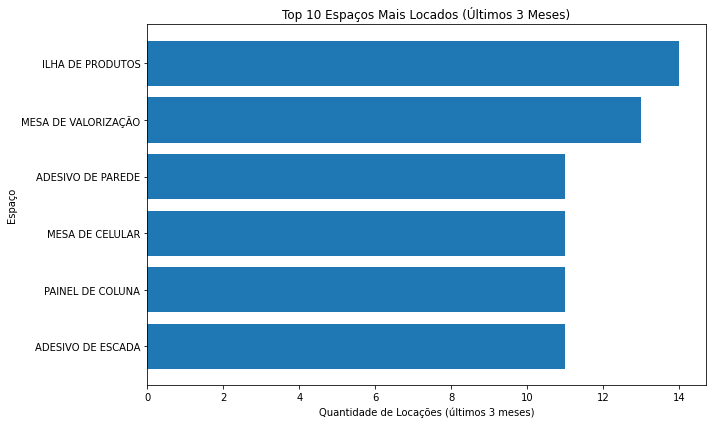

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Carrega a gold com dados agregados dos últimos 3 meses
df = spark.table("gold_espacos_destaque_3_meses")

# Pega os mais locados
df_top_espacos = (
    df.select("espaco", "qtd_locacoes_3m")
    .orderBy(col("qtd_locacoes_3m").desc())
    .limit(10)
)

# Converte para Pandas
pdf = df_top_espacos.toPandas()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.barh(pdf["espaco"], pdf["qtd_locacoes_3m"])
plt.xlabel("Quantidade de Locações (últimos 3 meses)")
plt.ylabel("Espaço")
plt.title("Top 10 Espaços Mais Locados (Últimos 3 Meses)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## ❓ Pergunta 4: Qual a taxa de ocupação dos espaços por loja?

Esta análise mostra a eficiência no uso dos espaços publicitários disponíveis por loja. A taxa de ocupação é calculada com base na quantidade de espaços que foram locados ao menos uma vez nos últimos 3 meses em relação ao total disponível.

### 📊 Gráfico: Taxa de ocupação (%) por loja (últimos 3 meses)


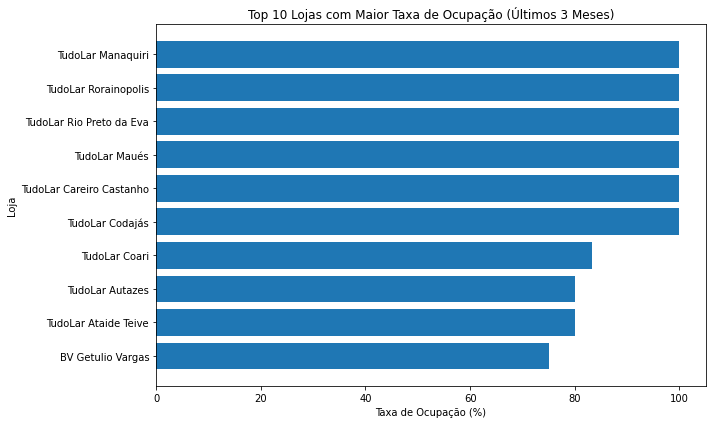

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Carrega a tabela gold com taxa de ocupação
df_taxa = spark.table("gold_taxa_ocupacao_por_loja") \
    .orderBy(col("taxa_ocupacao").desc()) \
    .limit(10)

# Converte para Pandas
pdf = df_taxa.toPandas()

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.barh(pdf["loja"], pdf["taxa_ocupacao"])
plt.xlabel("Taxa de Ocupação (%)")
plt.ylabel("Loja")
plt.title("Top 10 Lojas com Maior Taxa de Ocupação (Últimos 3 Meses)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## ❓ Pergunta 5: Quais espaços estão ociosos nos últimos 3 meses?

Esta análise identifica os espaços que **não foram utilizados para locações** no período recente. Ao agrupar os dados pelo nome do espaço (e não pelo ID individual por loja), é possível observar padrões de ociosidade e repensar a estratégia para ativos com baixa demanda.

### 📊 Gráfico: Quantidade de lojas com espaços ociosos (por nome do espaço)


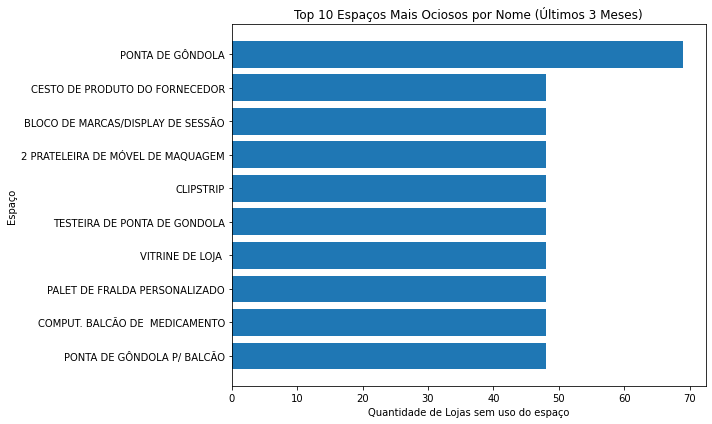

In [0]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, countDistinct

# Carrega os espaços ociosos
df_ociosos = spark.table("gold_espacos_ociosos")

# Agrega por nome do espaço (independente da loja)
df_agrupado = (
    df_ociosos.groupBy("espaco")
    .agg(countDistinct("loja").alias("qtd_lojas_ociosas"))
    .orderBy(col("qtd_lojas_ociosas").desc())
    .limit(10)
)

# Converter para Pandas
pdf = df_agrupado.toPandas()

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(pdf["espaco"], pdf["qtd_lojas_ociosas"])
plt.xlabel("Quantidade de Lojas sem uso do espaço")
plt.ylabel("Espaço")
plt.title("Top 10 Espaços Mais Ociosos por Nome (Últimos 3 Meses)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
